# Example (Ch. 9 Bathe)

The example considered next can be found in Chapter 9 of [BATHE].

In [1]:
using StructuralDynamicsODESolvers, Plots

## Problem formulation

In [2]:
M = [2 0; 0 1.]
K = [6 -2; -2 4.]
C = zeros(2, 2)
f = [0.0, 10.0]
example_9_1_Bathe = SecondOrderAffineContinuousSystem(M, C, K, f)

NSTEPS = 500
tdom = range(0, NSTEPS * 0.1, length=NSTEPS + 1)
U₀, U₀′ = zeros(2), zeros(2)
prob = InitialValueProblem(example_9_1_Bathe, (U₀, U₀′))

InitialValueProblem{SecondOrderAffineContinuousSystem{Float64, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, Vector{Float64}}, Tuple{Vector{Float64}, Vector{Float64}}}(SecondOrderAffineContinuousSystem{Float64, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, Vector{Float64}}([2.0 0.0; 0.0 1.0], [0.0 0.0; 0.0 0.0], [6.0 -2.0; -2.0 4.0], [0.0, 10.0]), ([0.0, 0.0], [0.0, 0.0]))

## Analytic solution

In [3]:
A = [1/√3  (1/2)*√(2/3);
     1/√3      -√(2/3)]
x₁(t) = (5 / √3) * (1 - cos(t*√2))
x₂(t) = (2 * √(2/3)) * (-1 + cos(t*√5))
U(t) = A * [x₁(t), x₂(t)]

U (generic function with 1 method)

## Central difference

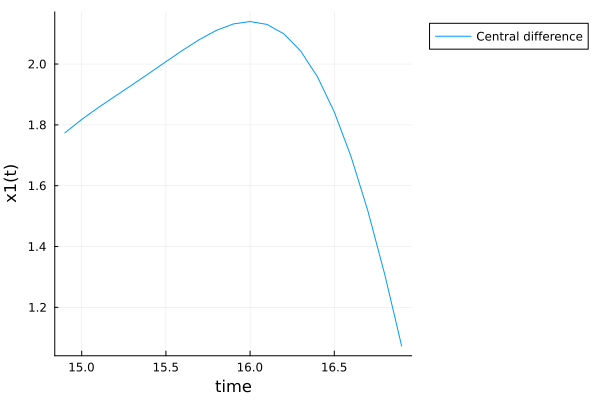

In [4]:
sol = solve(prob, CentralDifference(Δt=0.1); NSTEPS=NSTEPS) |> displacements
ind = 150:170
fig = plot(xlab="time", ylab="x1(t)", legend=:outertopright)
fig2 = plot(xlab="time", ylab="x1(t)", legend=:outertopright)
plot!(fig, tdom, [s[1] for s in sol], lab="Central difference")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Central difference")

## Houbolt

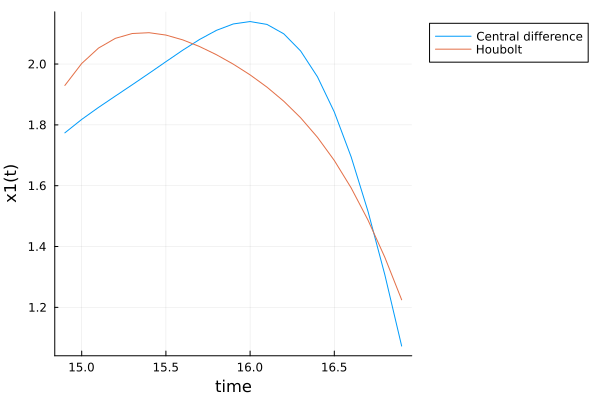

In [5]:
sol = solve(prob, Houbolt(Δt=0.1); NSTEPS=NSTEPS) |> displacements
plot!(fig, tdom, [s[1] for s in sol], lab="Houbolt")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Houbolt")

## Newmark

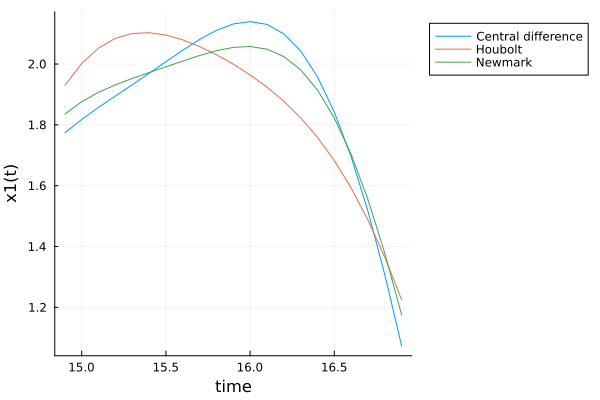

In [6]:
sol = solve(prob, Trapezoidal(Δt=0.1); NSTEPS=NSTEPS) |> displacements
plot!(fig, tdom, [s[1] for s in sol], lab="Newmark")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Newmark")

## Bathe

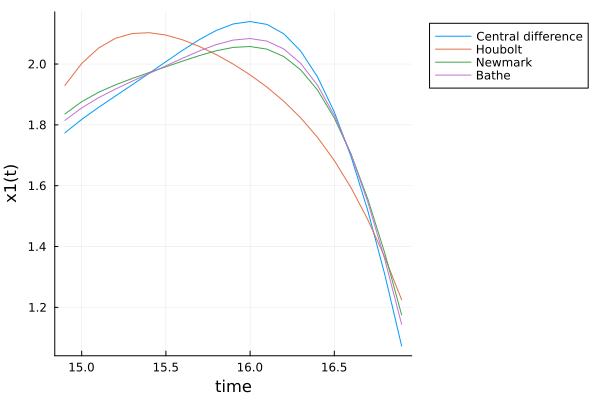

In [7]:
sol = solve(prob, Bathe(Δt=0.1); NSTEPS=NSTEPS) |> displacements
plot!(fig, tdom, [s[1] for s in sol], lab="Bathe")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Bathe")

## Analytic solution

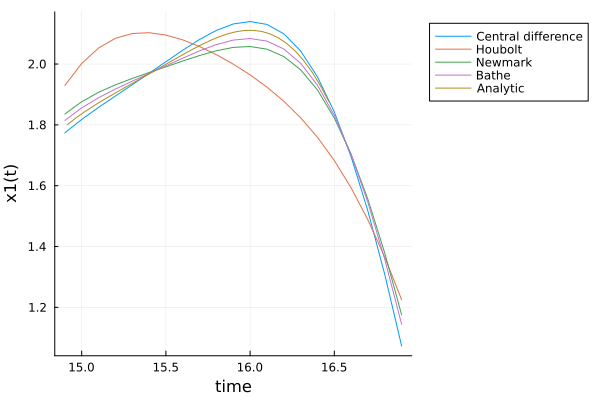

In [8]:
tdom = range(0, NSTEPS*0.1, length=1000)
plot!(fig, tdom, [U(t)[1] for t in tdom], lab="Analytic")
plot!(fig2, tdom[299:330], [U(t)[1] for t in tdom[299:330]], lab="Analytic")